## Volume Dataset for Conditional Segmentation

In [1]:
import numpy as np
import torch
import torch.utils.data
from connectomics.data.dataset import VolumeDatasetCond
from connectomics.data.utils import readh5, syn_sem2inst, seg2polarity
from connectomics.data.dataset.collate import collate_fn_train

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show(image, cmap='viridis', title='Test Title', interpolation=None):  
    num_imgs = image.shape[-3] # c (optional), z, y, x
    fig = plt.figure(figsize=(20., 3.))
    fig.suptitle(title, fontsize=14)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_imgs),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    image_list = np.split(image, num_imgs, -3)
    for ax, im in zip(grid, [np.squeeze(x) for x in image_list]):
        # Iterating over the grid returns the Axes.
        if im.ndim == 3:
            im = im.transpose(1,2,0)
        ax.imshow(im, cmap=cmap, interpolation=interpolation)
        ax.axis('off')

    plt.show()

(100, 1400, 700) uint8
(100, 1400, 700) uint8


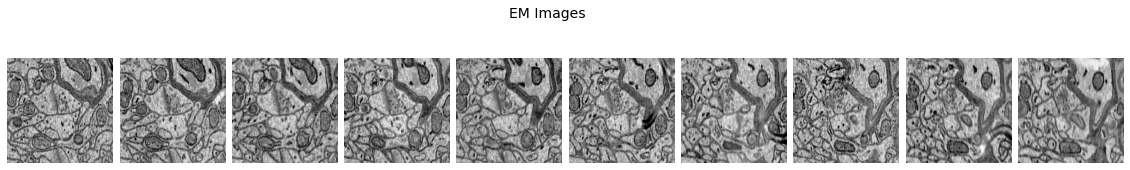

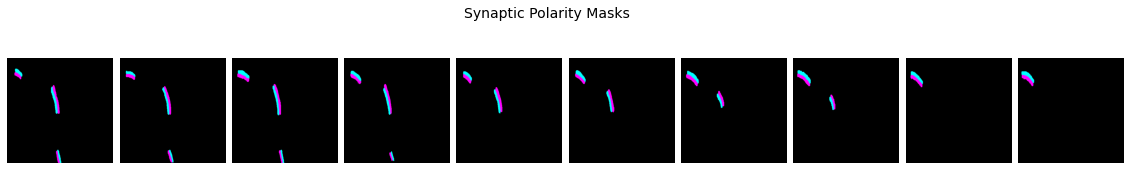

In [3]:
# load volumes
img = readh5("../datasets/synapse/img.h5")
syn = readh5("../datasets/synapse/syn.h5")
syn = syn_sem2inst(syn)
print(img.shape, img.dtype)
print(syn.shape, syn.dtype)

polarity = seg2polarity(syn)
show(img[50:60,:400,:400], title="EM Images", cmap='gray')
show(polarity[:,50:60,:400,:400], title="Synaptic Polarity Masks")

In [4]:
# construct the conditional volume dataset
ds = VolumeDatasetCond([img], [syn], label_type='syn', sample_size=(9,129,129))
loader = torch.utils.data.DataLoader(ds, batch_size=4, shuffle=False, pin_memory=False,
                                     collate_fn=collate_fn_train, num_workers=1)

Total number of samples to be generated:  114


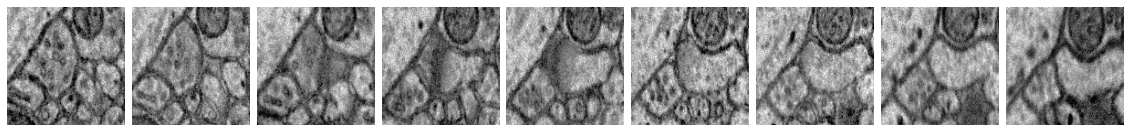

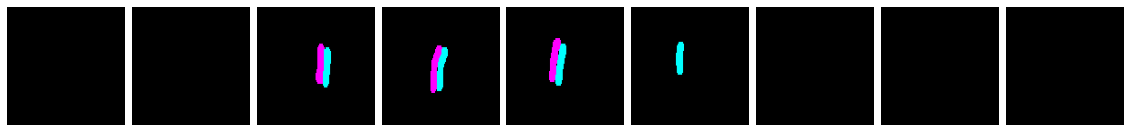

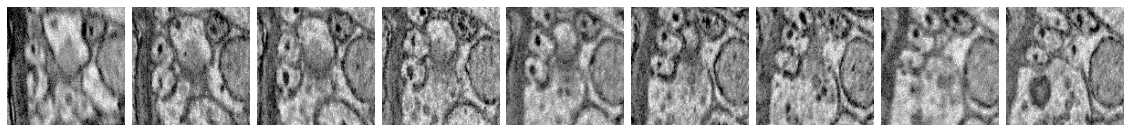

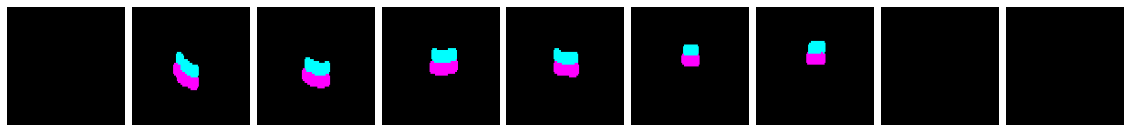

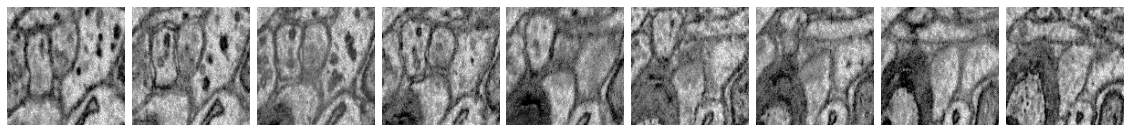

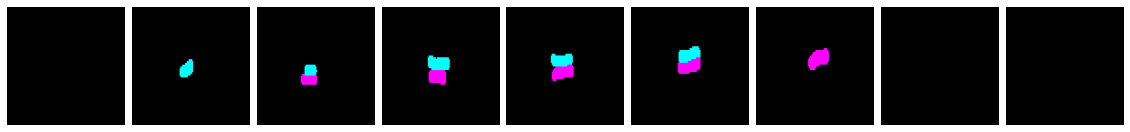

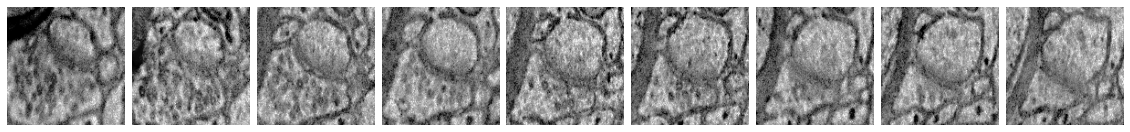

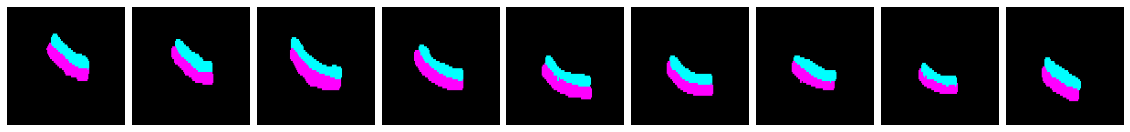

In [5]:
for _, sample in enumerate(loader):
    volume = sample.out_input
    target, weight = sample.out_target_l, sample.out_weight_l
    target_show = target[0]
    
    for j in range(volume.shape[0]):
        show(volume[j].numpy(), title=None, cmap='gray')
        show(target_show[j].numpy(), title=None)        
    break